# Modeling Drug Delivery in Solid Tumors
In this notebook, we will provide a simple walkthrough of how to use the cancer model code in order to model drug delivery within tumors. We will highlight the two main models provided within the model and the prebuilt tools to provide comparisons between them.

Import model files:

In [23]:
include("isolatedvelocity.jl")
include("isolatedpressure.jl")
include("soluteperm.jl")
include("isolatedmodel.jl")
include("makeplots.jl")

pressureplot (generic function with 1 method)

Specify the number of time and spatial nodes:

In [2]:
n_time = 2000
n_spatial = 100

100

Specify the known metabolic parameters:

In this example, we will use the parameters available for the 4T1 cell line of metastatic murine breast cancer using a 32nm diameter dexamethasone nanoparticle treatment.

In [3]:
Kt = 2.9712e-7  ##hydraulic conductivity control value taken from ACS Nano paper
Lpt = 8.6717e-7 #vascular hydraulic conductivity control value taken from ACS nano paper
Svt = 200      #tumor vascular density
D = 1.375e-07  #solute diffusion coefficient
rs = 16      #partical radius (nm)
R=1. # Tumor Radius
Pv=25. # Vascular Pressure mm Hg
Pvv=1. #Vascular pressure dimensionless
kd=1278*60 # Blood circulation time of drug in hours;
att=R*sqrt(Lpt*Svt/Kt) #Parameter alpha for tumor, ignoring lymphatics
at = [att for i=1:n_spatial]

100-element Array{Float64,1}:
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
  ⋮
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975

Calculate additional biological parameters:

In [4]:
Perm,sigma=soluteperm(Lpt,rs) #Vascular permeability and solute reflection coefficient respectively
att=R*sqrt(Lpt*Svt/Kt) #Parameter alpha for tumor, ignoring lymphatics
at = [att for i=1:n_spatial]

100-element Array{Float64,1}:
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
  ⋮
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975
 24.160236271476975

For this model, we assume 1D transport in spherical coordinates. Here we will discretize the spatial domain with respect to R:

In [5]:
dr = 1/(n_spatial-1)
r= (range(0,stop=R,length=n_spatial))./R

0.0:0.010101010101010102:0.9999999999999999

Using the previously defined parameters, we can now model the pressure and velocity profiles for this system. We will then use our pre-defined functions to plot these profiles.

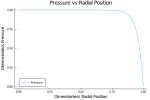

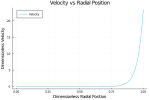

In [6]:
P= Isolated_Pressure(n_spatial,R,Lpt,Svt,Kt,Pvv,at)
v =Isolated_Velocity(n_spatial,P,r, dr)
pplot = pressureplot(r,P)
display(pplot)
vplot = velocityplot(r,v)
display(vplot)

Now we are ready to model the concentration profile of the drug particles within the tumor. We have two types of models avaialble for this purpose. The first is the low peclet regime which assumes that in the tumor enviornment, mass transport is taking place via both convection and diffusion. In the second type of model, we assume a high peclet regime in which convective mass transport dominates so much that we can neglect the effect of diffusive mass transport. This is important because for high peclet numbers, we encounter numerical erros when trying to model the system using a low peclet model.

For this example, we will model the concentration profile using a low peclet and high peclet model using the integrator provided by DifferentialEquations.jl. We also have available an Explicit Euler integration method for the high peclet regime, which is useful for optimization routines where the integration function needs to be provided by the user.

In [7]:
sol_lp =Isolated_Model(n_spatial,Kt,Lpt,Svt,D,sigma,Perm,R,Pv,Pvv,kd,n_time,at)
sol_hp = Isolated_Model_HP(n_spatial,Kt,Lpt,Svt,D,sigma,Perm,R,Pv,Pvv,kd,n_time,at)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Array{Float64,1}:
 0.0
 0.0005
 0.001
 0.0015
 0.002
 0.0025
 0.003
 0.0035
 0.004
 0.0045
 0.005
 0.0055
 0.006
 ⋮
 0.9945
 0.995
 0.9955
 0.996
 0.9965
 0.997
 0.9975
 0.998
 0.9985
 0.999
 0.9995
 1.0
u: 2001-element Array{Array{Float64,2},1}:
 [0.0; 0.0; … ; 0.0; 0.0]
 [1.1351346108399447e-11; 1.168938354542749e-11; … ; 0.0055649494465799506; 0.0]
 [2.270406598171392e-11; 2.3380208267539664e-11; … ; 0.011118662175751347; 0.0]
 [3.4058159765709836e-11; 3.507247515469785e-11; … ; 0.016661158223511854; 0.0]
 [4.541362824793251e-11; 4.6766188805597564e-11; … ; 0.02219253282677109; 0.0]
 [5.677047155632446e-11; 5.84613499484484e-11; … ; 0.02771280110256685; 0.0]
 [6.812868925763086e-11; 7.015795658019873e-11; … ; 0.0332219196804277; 0.0]
 [7.9488282566799e-11; 8.185601503984081e-11; … ; 0.038720023205974514; 0.0]
 [9.084925268370925e-11; 9.355553117517702e-11; … ; 0.04420723721190768; 0.0]
 [1.0221159960836156e-10; 1.05256

We can plot the concentration profile over the spatial domain at several times. This can be individually as well as combined on the same plot. Additionally, we can plot the percent error between the two models with respect to the spatial domain.

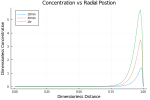

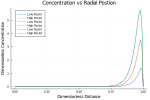

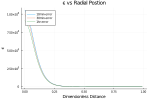

In [24]:
cplot_single = singleconcplot(r,sol_lp)
display(cplot_single)

cplot_double = doubleconcplot(r,sol_lp,sol_hp,["Low Peclet" "High Peclet"])
display(cplot_double)

cplot_error= errorconcplot(r,sol_lp,sol_hp)
display(cplot_error)

Finally, we can integrate over the spatial domain to get data for the spatially averaged drug accumulation over time. Once again, we can do this for both models and make individual and combined plots. Furthermore, we can also plot the percent error between the models over time.

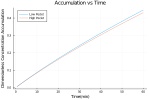

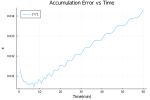

In [9]:
accum_lp= Accumulation_Model(sol_lp,n_spatial,n_time)
accum_hp= Accumulation_Model(sol_hp,n_spatial,n_time)
aplot_double= doubleaccumplot(sol_lp,sol_hp,["Low Peclet" "High Peclet"])
display(aplot_double)
aplot_error = Accumerrorplot(sol_lp,sol_hp)
display(aplot_error)

This concludes our tutorial of using the cancer model research files. For more information, please consult the documentation available on the [github page](https://github.com/stmorgenstern/CancerResearch/blob/gh-pages/docslatest.md).